# Import packages

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import Type

# Load datasets

In [54]:
core = pd.read_csv('core_dataset.csv')
hr_v9 = pd.read_csv('HRDataset_v9.csv')
hr_v13 = pd.read_csv('HRDataset_v13.csv')
prod_staff = pd.read_csv('production_staff.csv')
recruit_costs = pd.read_csv('recruiting_costs.csv')
salary_grid = pd.read_csv('salary_grid.csv')

# Clean data as needed as needed

In [55]:
core['Date of Hire'] = pd.to_datetime(core['Date of Hire'], errors='coerce')
core['Date of Termination'] = pd.to_datetime(core['Date of Termination'], errors='coerce')
core['DOB'] = pd.to_datetime(core['DOB'], errors='coerce')

# Head count by Department

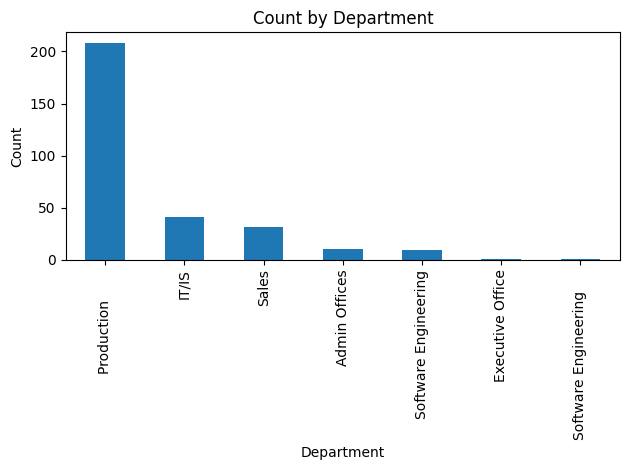

In [56]:
plt.figure()
dept_counts = core['Department'].value_counts()
dept_counts.plot(kind='bar', title='Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender Distribution

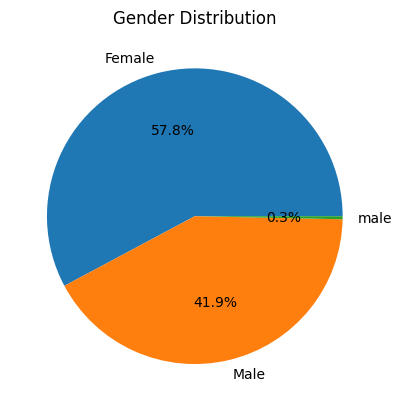

In [57]:
plt.figure()
gender_counts = core['Sex'].value_counts()
gender_counts.plot(kind ='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.ylabel('')
plt.show()

#Turnover Analysis

In [58]:
core['Terminated'] = core['Date of Termination'].notna()
turnover_rate = core['Terminated'].mean() * 100
print(f"Turnover Rate: {turnover_rate:.2f}%")

Turnover Rate: 34.11%


#Average Age by Department

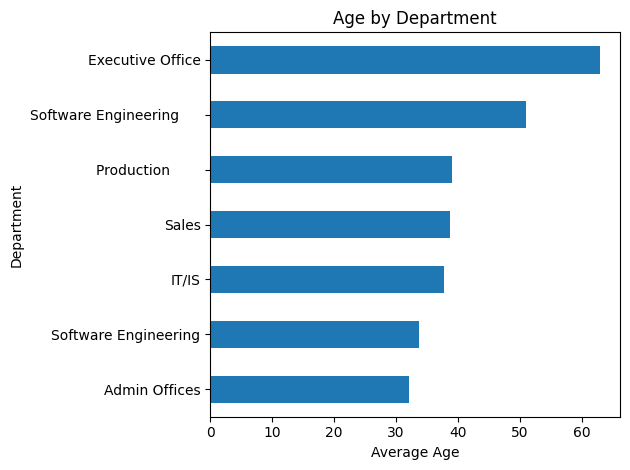

In [59]:
plt.figure()
avg_age_dept = core.groupby('Department')['Age'].mean().sort_values()
avg_age_dept.plot(kind='barh', title='Age by Department')
plt.xlabel('Average Age')
plt.tight_layout()
plt.show()

# Salary Analysis

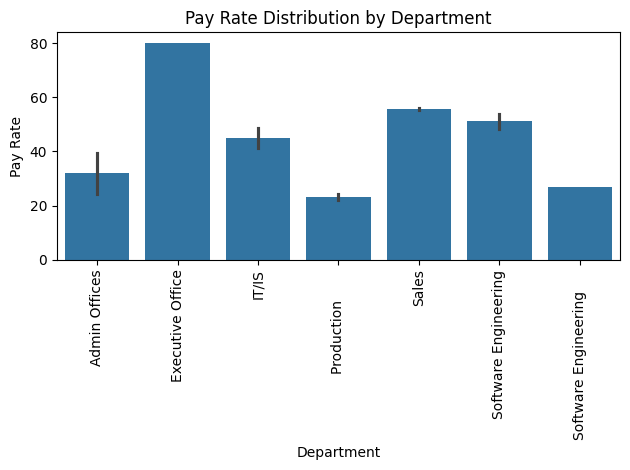

In [68]:
merged = core[['Employee Name', 'Pay Rate', 'Department', 'Position']].dropna()
plt.figure()
sns.barplot(x='Department', y='Pay Rate', data=merged)
plt.xticks(rotation=90)
plt.title('Pay Rate Distribution by Department')
plt.tight_layout()
plt.show()

#Recruitment Cost Over Time

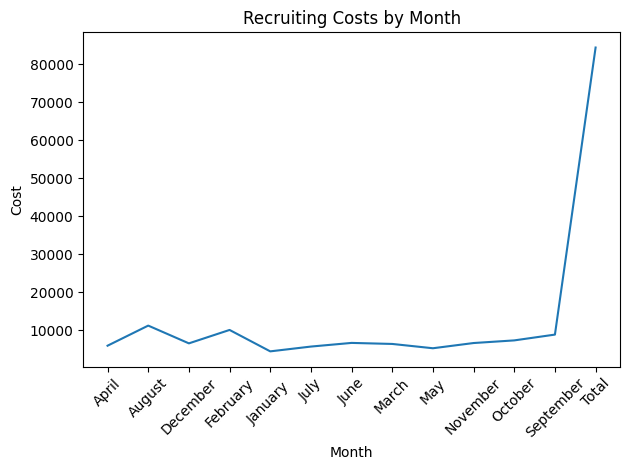

In [61]:
recruit_costs_long = pd.melt(recruit_costs, id_vars=['Employment Source'], var_name='Month', value_name='Cost')
recruit_costs_long['Cost'] = pd.to_numeric(recruit_costs_long['Cost'], errors='coerce')
plt.figure()
sns.lineplot(data=recruit_costs_long.groupby('Month')['Cost'].sum().reset_index(), x='Month', y='Cost')
plt.title('Recruiting Costs by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Performance Score Distribution

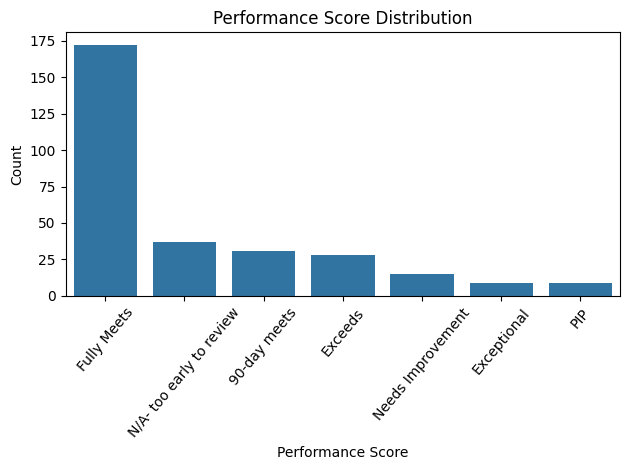

In [62]:
plt.figure()
perf_counts = core['Performance Score'].value_counts()
sns.barplot(x=perf_counts.index, y=perf_counts.values)
plt.title('Performance Score Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

#Average Tenure by Department

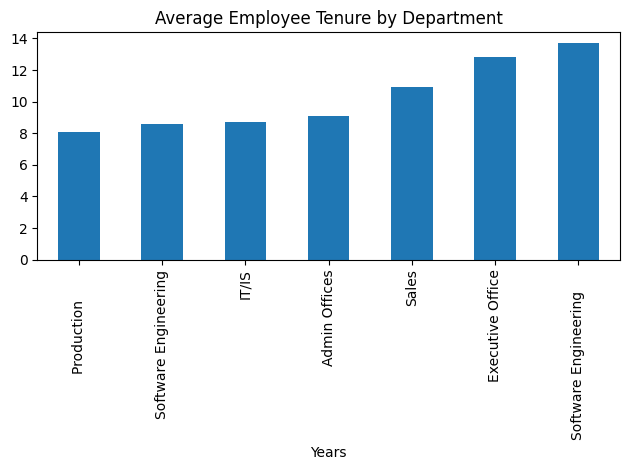

In [63]:
core['Tenure_Years'] = ((core['Date of Termination'].fillna(pd.Timestamp.today()) - core['Date of Hire']) / pd.Timedelta(days=365)).round(1)
plt.figure()
tenure = core.groupby('Department')['Tenure_Years'].mean().sort_values()
tenure.plot(kind='bar', title='Average Employee Tenure by Department')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

#New Hires Per Year

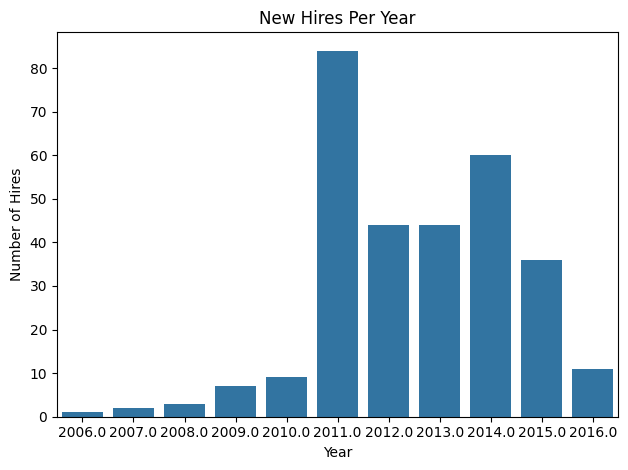

In [64]:
core['Hire Year'] = core['Date of Hire'].dt.year
plt.figure()
hire_trend = core['Hire Year'].value_counts().sort_index()
sns.barplot(x=hire_trend.index, y=hire_trend.values)
plt.title('New Hires Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.tight_layout()
plt.show()

#Recruitment Source Effectiveness

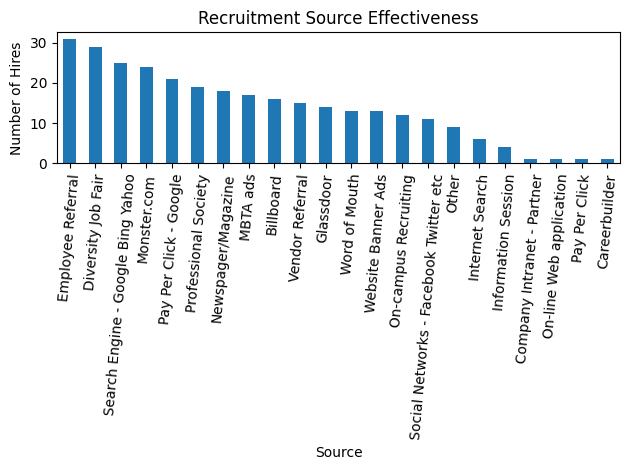

In [65]:
plt.figure()
source_counts = core['Employee Source'].value_counts()
source_counts.plot(kind='bar', title='Recruitment Source Effectiveness')
plt.xlabel('Source')
plt.ylabel('Number of Hires')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

#Employee Satisfaction

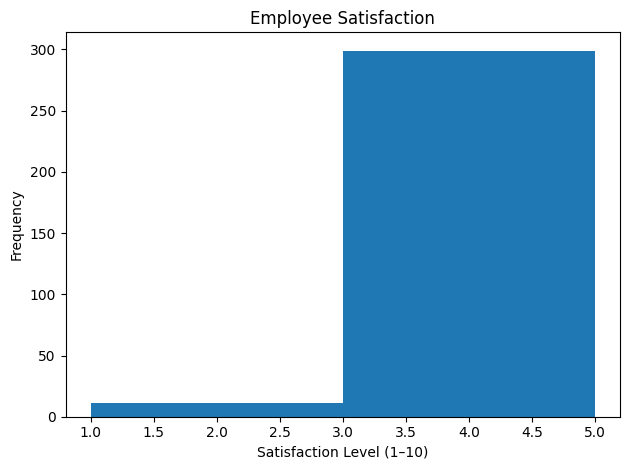

In [66]:
hr_v13['EmpSatisfaction'].dropna().plot(kind='hist', bins=2, title='Employee Satisfaction')
plt.xlabel('Satisfaction Level (1–10)')
plt.tight_layout()
plt.show()

#Engagement Survey Score by Department

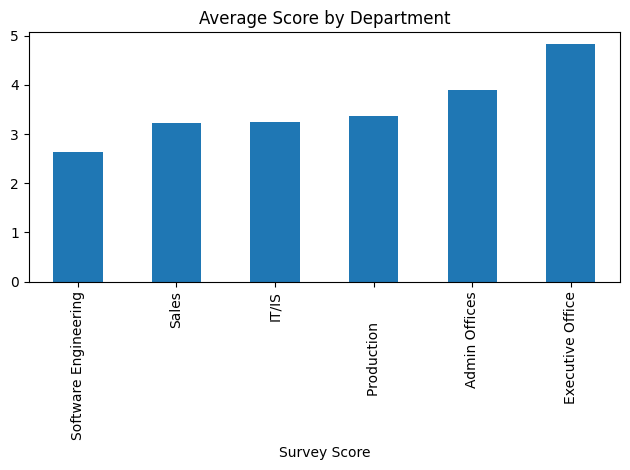

In [67]:
engagement = hr_v13.groupby('Department')['EngagementSurvey'].mean().sort_values()
plt.figure()
engagement.plot(kind='bar', title='Average Score by Department')
plt.xlabel('Survey Score')
plt.tight_layout()
plt.show()